**NEW ANALYSIS 9-30-2024**

To compare all three variables with different scales, I tried 3 one approaches:  
**Option 1: Use Dual-Axis + Normalization**  
Left Axis: Weekly Arrivals  
Right Axis: LWBS %  
Third Variable (Hrs > 140): Normalize the values (convert them to a common scale between 0 and 1) and display them as an additional line sharing either the left or right axis.  
This would allow us to compare the pattern, though the exact scale wouldn't be as clear.  
**Option 2: Dual-Axis with Two Subplots**  
Create two subplots, one with Weekly Arrivals and LWBS % on a dual axis and the other showing Hrs > 140 with one of the previous metrics (like Weekly Arrivals).  
This separates the comparison but keeps all information visible at once.  
**Option 3: Three Variables with Three "Virtual" Axes**  
Use a dual y-axis (one for arrivals, one for LWBS %) and plot the third variable (Hrs > 140) by scaling it visually so it fits within the range of one of the other axes.  
The scale is relative, but markers can to indicate actual values.

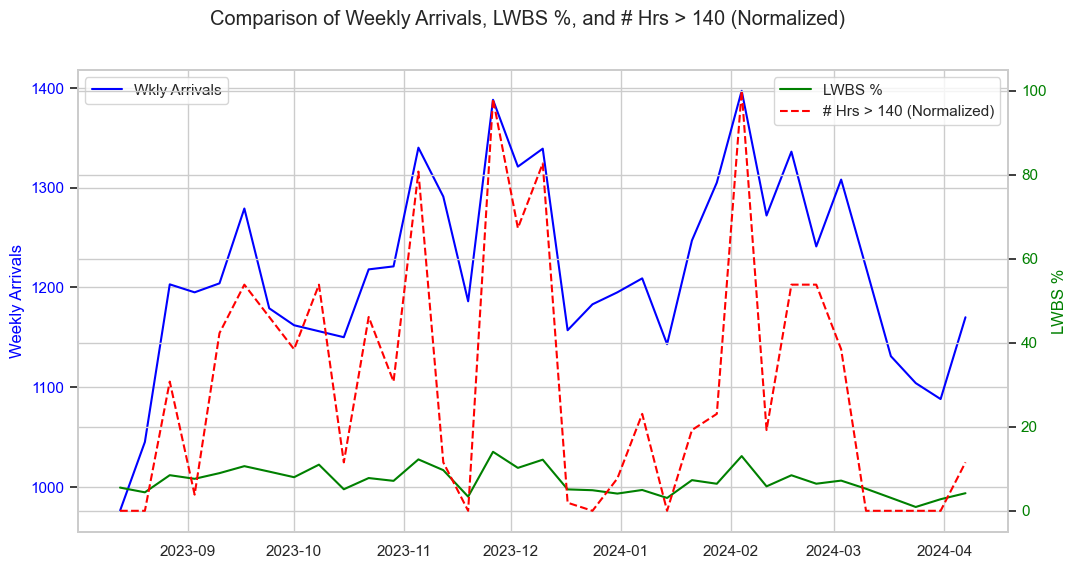

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data input
data = {
    'Week Begin': [
        '8/13/2023', '8/20/2023', '8/27/2023', '9/3/2023', '9/10/2023', '9/17/2023', 
        '9/24/2023', '10/1/2023', '10/8/2023', '10/15/2023', '10/22/2023', '10/29/2023', 
        '11/5/2023', '11/12/2023', '11/19/2023', '11/26/2023', '12/3/2023', '12/10/2023', 
        '12/17/2023', '12/24/2023', '12/31/2023', '1/7/2024', '1/14/2024', '1/21/2024', 
        '1/28/2024', '2/4/2024', '2/11/2024', '2/18/2024', '2/25/2024', '3/3/2024', 
        '3/10/2024', '3/17/2024', '3/24/2024', '3/31/2024', '4/7/2024'
    ],
    '# Hrs >140': [
        0, 0, 16, 2, 22, 28, 24, 20, 28, 6, 24, 16, 42, 6, 0, 51, 35, 43, 1, 0, 4, 12, 0, 
        10, 12, 52, 10, 28, 28, 20, 0, 0, 0, 0, 6
    ],
    'Wkly Arrivals': [
        976, 1045, 1203, 1195, 1204, 1279, 1179, 1162, 1156, 1150, 1218, 1221, 1340, 
        1291, 1186, 1388, 1321, 1339, 1157, 1183, 1195, 1209, 1143, 1247, 1305, 1397, 
        1272, 1336, 1241, 1308, 1220, 1131, 1104, 1088, 1170
    ],
    'LWBS %': [
        5.53, 4.40, 8.48, 7.62, 8.97, 10.63, 9.33, 8.00, 10.99, 5.13, 7.80, 7.13, 
        12.24, 9.68, 3.37, 14.05, 10.22, 12.17, 5.10, 4.90, 4.10, 4.96, 3.06, 7.30, 
        6.44, 13.03, 5.82, 8.46, 6.45, 7.19, 5.25, 3.09, 0.91, 2.76, 4.19
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Week Begin' to datetime
df['Week Begin'] = pd.to_datetime(df['Week Begin'])

# Plot Option 1: Dual-Axis + Normalization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Weekly Arrivals on the left axis
ax1.plot(df['Week Begin'], df['Wkly Arrivals'], color='blue', label='Wkly Arrivals')
ax1.set_ylabel('Weekly Arrivals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for LWBS % on the right
ax2 = ax1.twinx()
ax2.plot(df['Week Begin'], df['LWBS %'], color='green', label='LWBS %')
ax2.set_ylabel('LWBS %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Normalize # Hrs >140 and plot it with a secondary axis
hrs_normalized = df['# Hrs >140'] / df['# Hrs >140'].max()
ax2.plot(df['Week Begin'], hrs_normalized * 100, color='red', label='# Hrs > 140 (Normalized)', linestyle='dashed')

# Legends and title
fig.suptitle('Comparison of Weekly Arrivals, LWBS %, and # Hrs > 140 (Normalized)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


**Analysis of Above**
This chart displays all three variables with two y-axes:
- Left Axis (Blue): Weekly Arrivals
- Right Axis (Green): LWBS %
- Red Dashed Line: # of Hours > 140 (Normalized for comparison)  
By normalizing the "Hrs > 140" variable, I was able to fit it into the same chart while comparing the pattern with the other two metrics. Though the absolute scale of "Hrs > 140" isn't shown directly, the shape of the pattern is compared to LWBS % and Weekly Arrivals. 

I normalized the # Hrs > 140 by dividing each value by the maximum value in that column. This scaled the values between 0 and 1, making it easier to compare against other metrics with different ranges.

Here’s the formula I used for normalization:
Normalized Hrs > 140 = Hrs > 140/Maximum Hrs > 140

To make it visually comparable on the same graph, I then multiplied the normalized values by 100, so the line would align with the scale of the LWBS % axis. Essentially, the normalized values reflect the relative proportion of Hrs > 140 compared to its maximum value. If you have other suggestions for normalization if we go this route, just let me know.

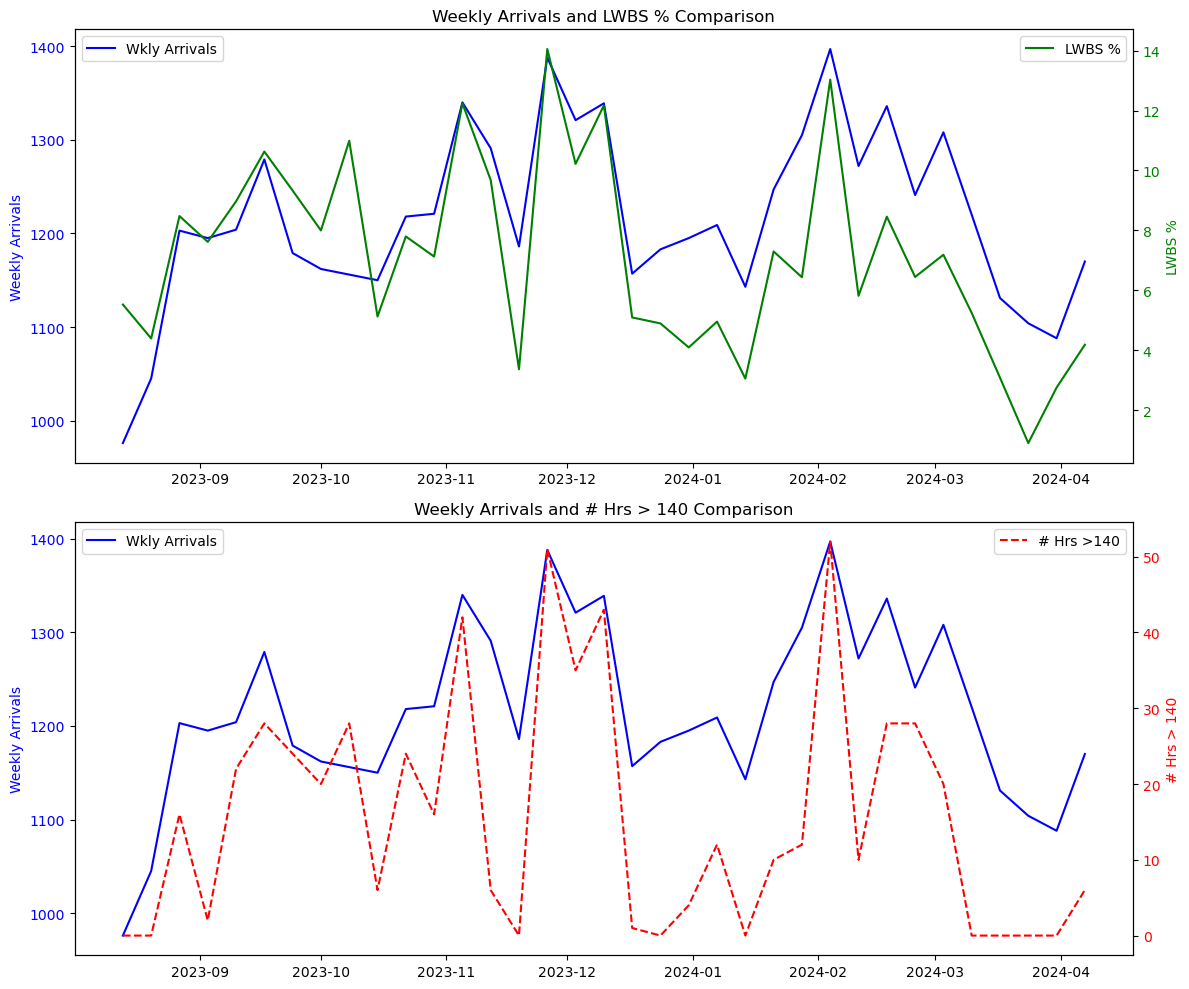

In [2]:
# Plot Option 2: Dual-Axis with Two Subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# First subplot: Weekly Arrivals and LWBS % with dual axis
ax1.plot(df['Week Begin'], df['Wkly Arrivals'], color='blue', label='Wkly Arrivals')
ax1.set_ylabel('Weekly Arrivals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for LWBS % on the right for first subplot
ax1b = ax1.twinx()
ax1b.plot(df['Week Begin'], df['LWBS %'], color='green', label='LWBS %')
ax1b.set_ylabel('LWBS %', color='green')
ax1b.tick_params(axis='y', labelcolor='green')

# Subplot 1 legends and title
ax1.set_title('Weekly Arrivals and LWBS % Comparison')
ax1.legend(loc='upper left')
ax1b.legend(loc='upper right')

# Second subplot: Weekly Arrivals and Hrs >140
ax2.plot(df['Week Begin'], df['Wkly Arrivals'], color='blue', label='Wkly Arrivals')
ax2.set_ylabel('Weekly Arrivals', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Hrs >140
ax2b = ax2.twinx()
ax2b.plot(df['Week Begin'], df['# Hrs >140'], color='red', label='# Hrs >140', linestyle='dashed')
ax2b.set_ylabel('# Hrs > 140', color='red')
ax2b.tick_params(axis='y', labelcolor='red')

# Subplot 2 legends and title
ax2.set_title('Weekly Arrivals and # Hrs > 140 Comparison')
ax2.legend(loc='upper left')
ax2b.legend(loc='upper right')

plt.tight_layout()
plt.show()


In this second option, I used two subplots to display the relationships:
Top Subplot: A comparison of Weekly Arrivals (blue) and LWBS % (green), each with its own axis.
Bottom Subplot: A comparison of Weekly Arrivals (blue) and # Hrs > 140 (red dashed line), also using a dual-axis.

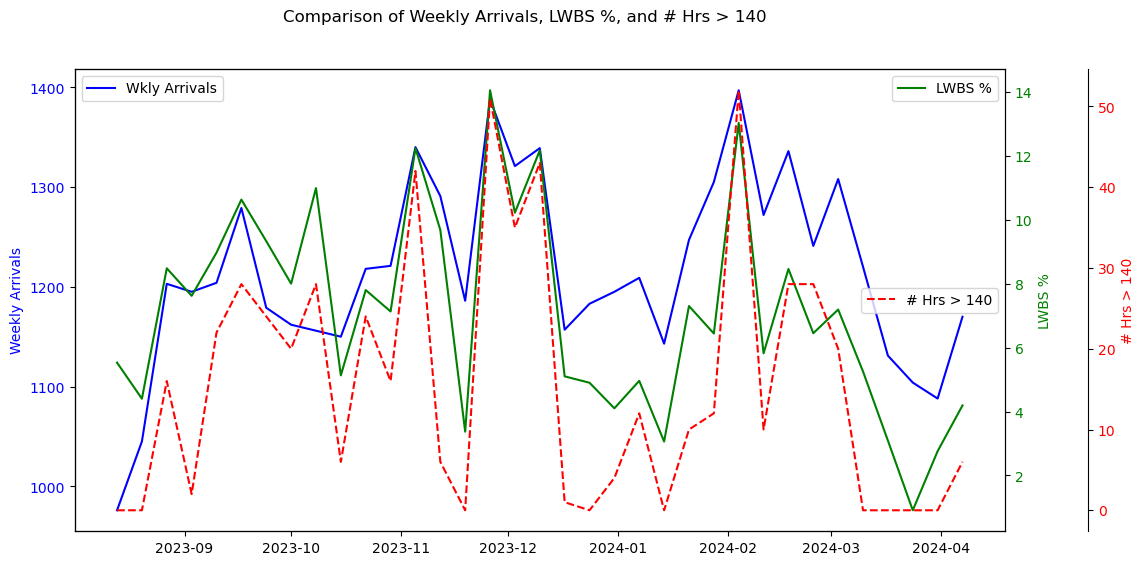

In [3]:
# Plot Option 3: Three Variables with Three "Virtual" Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Weekly Arrivals on the left axis
ax1.plot(df['Week Begin'], df['Wkly Arrivals'], color='blue', label='Wkly Arrivals')
ax1.set_ylabel('Weekly Arrivals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for LWBS % on the right
ax2 = ax1.twinx()
ax2.plot(df['Week Begin'], df['LWBS %'], color='green', label='LWBS %')
ax2.set_ylabel('LWBS %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third "virtual" axis for # Hrs >140 (overlay with its own scaling)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move third axis outward
ax3.plot(df['Week Begin'], df['# Hrs >140'], color='red', label='# Hrs > 140', linestyle='dashed')
ax3.set_ylabel('# Hrs > 140', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Legends and title
fig.suptitle('Comparison of Weekly Arrivals, LWBS %, and # Hrs > 140')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

plt.show()


For Option 3, I used three "virtual" axes:
Left Axis (Blue): Weekly Arrivals
Right Axis (Green): LWBS %
Third Axis (Red, Dashed Line): # Hrs > 140, positioned slightly outward for better visibility
This chart allows us to compare all three variables in one plot, each having its own distinct scale.

Summary of Comparisons:
Option 1 (Dual Axis + Normalization): Simplifies by normalizing the third variable to allow all three to fit, but the scale of the normalized variable is abstract.
Option 2 (Two Subplots): Separates comparisons across two different subplots for clarity but sacrifices a direct one-to-one comparison.
Option 3 (Three "Virtual" Axes): Puts all three variables on the same chart with clear distinctions for each axis, but may be visually complex with closely overlapping lines.

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Excel file and the specific sheet 'WeeklyData'
file_path = 'PEDOCS Analysis 9-30-2024.xlsx'  
xls = pd.ExcelFile(file_path)

# Step 3: Check the sheet names (optional, just to verify the available sheets)
print(xls.sheet_names)

# Step 4: Load the 'WeeklyData' sheet into a DataFrame
df_weekly_data = pd.read_excel(xls, sheet_name="WeeklyData")

# Step 5: Display the first few rows to understand the data
df_weekly_data.head()


['Pivot', 'WeeklyData', 'Original File Name', 'MLS Analyze', 'Sheet3', 'Totals']


,Week Begin,# Hrs >140,Wkly Arrivals,Weekly LWBS,LWBS %,Sum of Sedation Cnt,Sum of STS Activation Count,Sum of Team5_Cnt
0,2023-08-13,0,976,54,0.055328,41,69,5
1,2023-08-20,0,1045,46,0.044019,33,92,56
2,2023-08-27,16,1203,102,0.084788,35,107,36
3,2023-09-03,2,1195,91,0.076151,31,107,122
4,2023-09-10,22,1204,108,0.089701,34,91,138


In [7]:
# Summary statistics for the dataset
df_weekly_data.describe()

,Week Begin,# Hrs >140,Wkly Arrivals,Weekly LWBS,LWBS %,Sum of Sedation Cnt,Sum of STS Activation Count,Sum of Team5_Cnt
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2023-12-10 00:00:00,15.600000,1215.971429,88.485714,0.071066,24.514286,81.771429,201.371429
min,2023-08-13 00:00:00,0.000000,976.000000,10.000000,0.009058,12.000000,57.000000,5.000000
25%,2023-10-11 12:00:00,0.500000,1159.500000,56.000000,0.049328,22.000000,73.500000,186.000000
50%,2023-12-10 00:00:00,12.000000,1204.000000,87.000000,0.071253,24.000000,81.000000,217.000000
75%,2024-02-07 12:00:00,26.000000,1285.000000,111.500000,0.091500,27.000000,90.500000,238.500000
max,2024-04-07 00:00:00,52.000000,1397.000000,195.000000,0.140490,41.000000,107.000000,270.000000
std,NaN,15.649093,93.685169,44.873922,0.031960,6.279619,12.595718,62.646574


In [ ]:
Look at Trends over time

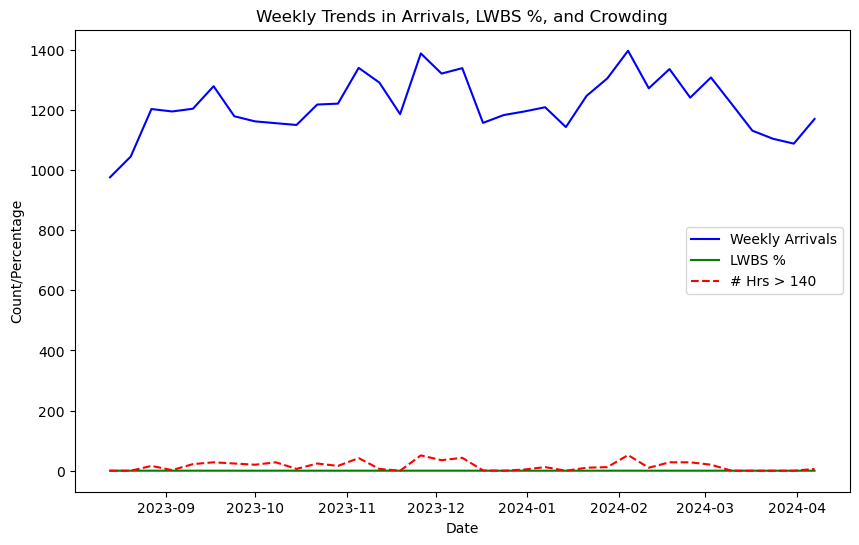

In [11]:
# Step 1: Convert the 'Week Begin' column (or the actual date column) to datetime
df_weekly_data['Week Begin'] = pd.to_datetime(df_weekly_data['Week Begin'])

# Step 2: Plot Weekly Arrivals, LWBS %, and # Hrs > 140 over time
plt.figure(figsize=(10, 6))
plt.plot(df_weekly_data['Week Begin'], df_weekly_data['Wkly Arrivals'], label='Weekly Arrivals', color='blue')
plt.plot(df_weekly_data['Week Begin'], df_weekly_data['LWBS %'], label='LWBS %', color='green')
plt.plot(df_weekly_data['Week Begin'], df_weekly_data['# Hrs >140'], label='# Hrs > 140', color='red', linestyle='--')
plt.title('Weekly Trends in Arrivals, LWBS %, and Crowding')
plt.xlabel('Date')
plt.ylabel('Count/Percentage')
plt.legend()
plt.show()



**Correlation Between Metrics:**  

Analyze the relationship between variables like Arrivals, LWBS %, and # Hrs > 140 to help understand whether higher arrivals or crowding are strong predictors of LWBS %.

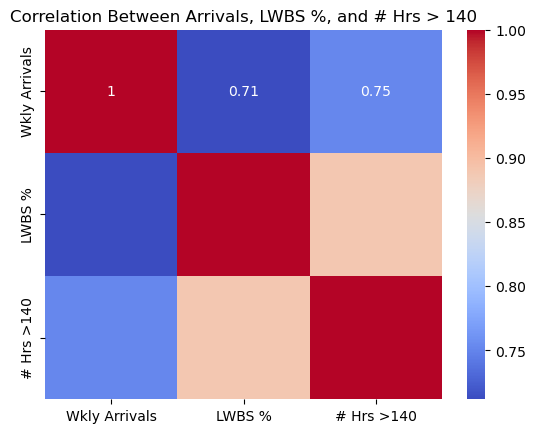

**Look for intervention effectiveness**

In [17]:
# Filter for pre- and post-intervention periods
intervention_date = pd.to_datetime('2024-02-11')  # Need to Adjust based on actual intervention start date once I validate with the tam

pre_intervention = df_weekly_data[df_weekly_data['Week Begin'] < intervention_date]
post_intervention = df_weekly_data[df_weekly_data['Week Begin'] >= intervention_date]

# Compare the average LWBS % and Hrs > 140 before and after the intervention
print("Pre-intervention:")
print(pre_intervention[['LWBS %', '# Hrs >140']].mean())
print("\nPost-intervention:")
print(post_intervention[['LWBS %', '# Hrs >140']].mean())


Pre-intervention:
LWBS %         0.078705
# Hrs >140    17.461538
dtype: float64

Post-intervention:
LWBS %         0.049000
# Hrs >140    10.222222
dtype: float64


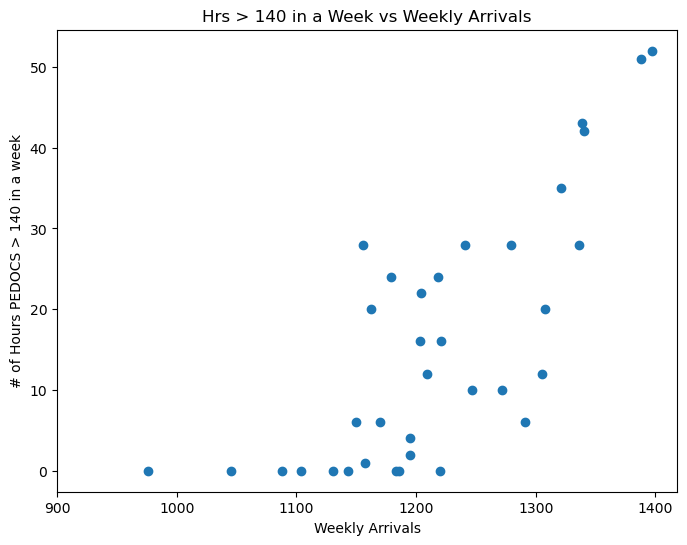

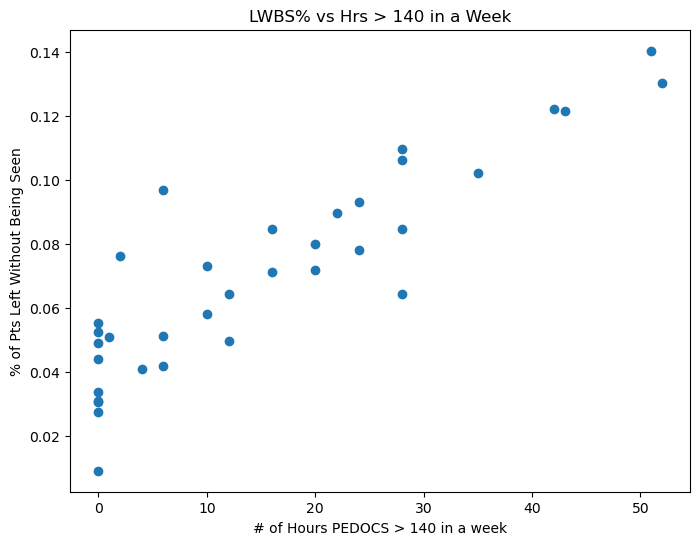

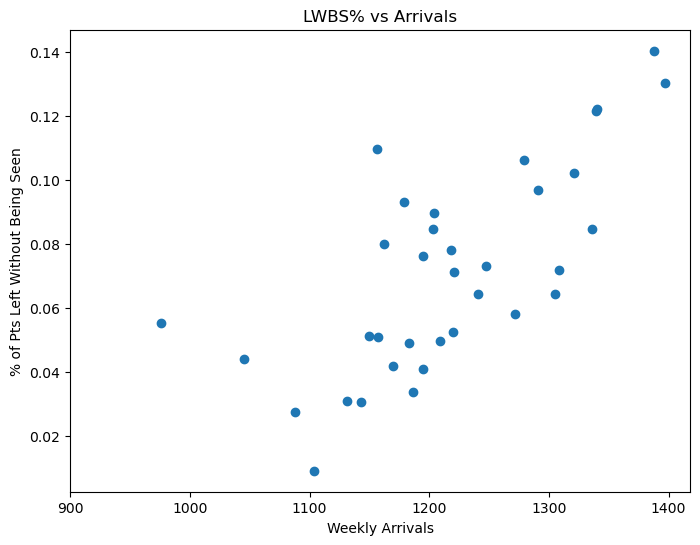

In [31]:
import matplotlib.pyplot as plt

# Scatterplot 1: Hrs > 140 in a Day vs Daily Arrivals
plt.figure(figsize=(8, 6))
plt.scatter(df_weekly_data['Wkly Arrivals'], df_weekly_data['# Hrs >140'])
plt.title('Hrs > 140 in a Week vs Weekly Arrivals')
plt.xlabel('Weekly Arrivals')
plt.ylabel('# of Hours PEDOCS > 140 in a week')
plt.xlim(900)  # Set x-axis limit to start at 900
plt.show()

# Scatterplot 2: LWBS% vs Hrs > 140 in a Day
plt.figure(figsize=(8, 6))
plt.scatter(df_weekly_data['# Hrs >140'], df_weekly_data['LWBS %'])
plt.title('LWBS% vs Hrs > 140 in a Week')
plt.xlabel('# of Hours PEDOCS > 140 in a week')
plt.ylabel('% of Pts Left Without Being Seen')
plt.show()

# Scatterplot 3: LWBS% vs Arrivals
plt.figure(figsize=(8, 6))
plt.scatter(df_weekly_data['Wkly Arrivals'], df_weekly_data['LWBS %'])
plt.title('LWBS% vs Arrivals')
plt.xlabel('Weekly Arrivals')
plt.ylabel('% of Pts Left Without Being Seen')
plt.xlim(900)  # Set x-axis limit to start at 900
plt.show()


**Scatterplot 1: Hrs > 140 in a Day vs Weekly Arrivals**  
Insight: As Weekly Arrivals increase, the number of Hrs > 140 (hours when the Pediatric Emergency Department Occupancy Scale exceeded 140) also rises. This indicates that higher patient volumes are strongly associated with more crowding (higher PEDOCS hours).  
**Scatterplot 2: LWBS% vs Hrs > 140 in a Day**  
Insight: There is a noticeable positive correlation between LWBS % (percentage of patients leaving without being seen) and Hrs > 140. More crowded hours (when PEDOCS exceeds 140) seem to result in a higher proportion of patients leaving without being seen. This suggests that managing crowding could help reduce the LWBS rate.
**Scatterplot 3: LWBS% vs Weekly Arrivals**  
Insight: Similarly, higher Weekly Arrivals are associated with higher LWBS %. When more patients arrive at the emergency department, the rate of patients leaving without being seen tends to increase. This confirms that patient volume is a significant factor influencing LWBS.

In [23]:
import statsmodels.api as sm

# Prepare the data for regression
# We'll predict LWBS % based on Weekly Arrivals and # Hrs > 140

# Define the independent variables (Weekly Arrivals and # Hrs > 140)
X = df_weekly_data[['Wkly Arrivals', '# Hrs >140']]

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Define the dependent variable (LWBS %)
y = df_weekly_data['LWBS %']

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Display the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LWBS %   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     62.06
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           9.71e-12
Time:                        23:43:47   Log-Likelihood:                 99.094
No. Observations:                  35   AIC:                            -192.2
Df Residuals:                      32   BIC:                            -187.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0039      0.048      0.082      0.935      -0.093       0.101
Wkly Arrivals  3.391e-05   4.14e-05      0.819      0.419   -5.05e-05       0.000
# Hrs >140        0.0017      0.000      6.707      0.000       0.001       0.002
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.243
Skew:                           0.331   Prob(JB):                        0.537
Kurtosis:                       3.643   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key Outputs from the OLS Regression:
Dependent Variable: The dependent variable here is LWBS %, which is the percentage of patients who left without being seen.

Independent Variables:

Wkly Arrivals: The weekly patient arrivals.
-# Hrs > 140: The number of hours in the week where the PEDOCS score exceeded 140, indicating crowding.
Model Summary:
R-squared (0.795): This means that 79.5% of the variation in LWBS % is explained by the independent variables (Weekly Arrivals and # Hrs > 140). This is a strong value, indicating that the model does a good job explaining the relationship between the independent variables and the dependent variable.

Adj. R-squared (0.782): The adjusted R-squared value takes into account the number of variables in the model. It is slightly lower than the R-squared value but still high, which suggests that the model is effective even after adjusting for the number of predictors.

F-statistic (62.06) and Prob (F-statistic) (9.71e-12): The F-statistic tests whether the overall regression model is a good fit for the data. The very low p-value (near zero) indicates that the model is statistically significant, meaning that the predictors together explain a significant portion of the variability in LWBS %.

Coefficients and Their Interpretation:
const (0.0039): This is the intercept of the regression, which means that when all other variables are zero, the model predicts an LWBS % of 0.39%. However, the intercept is not statistically significant (p = 0.935), meaning it does not provide meaningful information in this context.

Wkly Arrivals (3.391e-05): This coefficient represents the change in LWBS % for every additional arrival. The coefficient is very small, which means that weekly arrivals alone do not have a significant impact on LWBS % (p = 0.419). The p-value is above 0.05, indicating that Weekly Arrivals is not statistically significant in this model. This suggests that the number of patient arrivals doesn't contribute much on its own to the LWBS rate when accounting for other factors like crowding.

##Hrs >140 (0.0017): This coefficient represents the change in LWBS % for every additional hour where the PEDOCS score exceeds 140. The positive and statistically significant coefficient (p = 0.000) indicates that for every additional hour of crowding, the LWBS % increases by 0.17%. This is a strong relationship, suggesting that crowding is a key driver of patients leaving without being seen.##

Additional Statistics:
Omnibus (2.386), Prob(Omnibus) (0.303): This tests whether the residuals (errors) from the model are normally distributed. The p-value (0.303) suggests that the residuals are normally distributed, which is a good sign for the model’s validity.

Durbin-Watson (1.261): This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation. Since the value here is slightly below 2, there might be slight positive autocorrelation in the residuals, though it’s not a major concern.

Condition Number (2.30e+04): A high condition number indicates potential issues with multicollinearity (i.e., the independent variables are highly correlated with each other). A value above 30 can indicate multicollinearity, and the high value here suggests that Weekly Arrivals and # Hrs > 140 might be collinear. This could make it difficult to separate their individual effects.

Key Takeaways:
Crowding (# Hrs > 140) has a significant and positive effect on the LWBS %. This means that as the number of hours where the PEDOCS score exceeds 140 increases, more patients leave without being seen.

Weekly Arrivals on its own does not have a significant impact on LWBS % in this model, likely because it is highly correlated with crowding. Crowding might capture more of the relevant impact on LWBS %.

The high condition number suggests multicollinearity between Weekly Arrivals and # Hrs > 140. This could be addressed by potentially removing one of the variables or transforming the data to reduce correlation.

In [25]:
#CHECK THE VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the model
X = sm.add_constant(df_weekly_data[['Wkly Arrivals', '# Hrs >140']])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif


,Variable,VIF
0,const,356.507679
1,Wkly Arrivals,2.302423
2,# Hrs >140,2.302423


**Interpretation of VIF Results:**
Const (VIF = 356.51): This high VIF for the constant is not a concern. The constant (intercept) is usually high and can be ignored for multicollinearity purposes.

Wkly Arrivals (VIF = 2.30): The VIF for Weekly Arrivals is relatively low, well below the threshold of 10, which means there isn’t a severe multicollinearity issue with Wkly Arrivals.

-# Hrs > 140 (VIF = 2.30): Similarly, the VIF for # Hrs > 140 is also low, meaning there's no severe multicollinearity with this variable either.

Conclusion:
The VIF values are all within an acceptable range (below 5), indicating that multicollinearity is not a significant issue between Wkly Arrivals and # Hrs > 140.

Next Steps:
Given that multicollinearity is not a major concern, we can proceed with refining the model further.
Keep both variables in the model as there doesn’t appear to be a strong multicollinearity problem.

Improve the model by exploring regularization techniques (e.g., Ridge or Lasso regression) to address any overfitting or further control variable effects.

Key Points:
Alpha (Regularization Strength):

In both Ridge and Lasso, the alpha parameter controls the amount of regularization. A higher alpha means more regularization (more penalty), which will shrink the coefficients more aggressively.
You can experiment with different alpha values to find the best fit for your data.

Mean Squared Error (MSE):
We use MSE to evaluate how well the model predicts on the test data. A lower MSE indicates a better fit.
Ridge Regression Coefficients:

Ridge reduces the magnitude of the coefficients, but all variables remain in the model. You'll see how much Weekly Arrivals and # Hrs > 140 contribute to predicting LWBS % after regularization.
Lasso Regression Coefficients:

Lasso can shrink some coefficients to exactly zero, effectively eliminating variables from the model. This will show you which features are most important for predicting LWBS %.


In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data (using Weekly Arrivals and # Hrs > 140 as features)
X = df_weekly_data[['Wkly Arrivals', '# Hrs >140']]
y = df_weekly_data['LWBS %']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(X_train, y_train)

# Predict and evaluate the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression MSE:", ridge_mse)

# Step 4: Apply Lasso Regression
lasso_model = Lasso(alpha=0.01)  # alpha controls the regularization strength
lasso_model.fit(X_train, y_train)

# Predict and evaluate the Lasso model
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Lasso Regression MSE:", lasso_mse)


Ridge Regression Coefficients: [-7.72965339e-06  1.89643745e-03]
Ridge Regression MSE: 0.000343336100427483
Lasso Regression Coefficients: [4.81639707e-06 1.79482348e-03]
Lasso Regression MSE: 0.0003187608186608863


Interpretation of Ridge and Lasso Regression Results:
1. Ridge Regression:
Coefficients:

Wkly Arrivals: -7.73e-06 (a very small negative value).
-# Hrs > 140: 1.896e-03 (positive and much larger than the coefficient for Wkly Arrivals).
This means that, in the Ridge model, # Hrs > 140 has a larger impact on LWBS % compared to Wkly Arrivals. Specifically, for every additional hour of crowding, the LWBS % increases by approximately 0.1896%. The impact of Wkly Arrivals is negligible.

Ridge MSE (0.000343): This is the mean squared error for the Ridge model, indicating how well the model predicts on the test set. A lower MSE is better, but this value is quite small, which shows that the model is performing well in terms of accuracy.

2. Lasso Regression:
Coefficients:

Wkly Arrivals: 4.81e-06 (very small, near zero).
-# Hrs > 140: 1.795e-03 (positive and again much larger than the coefficient for Wkly Arrivals).
Similar to Ridge, Lasso Regression suggests that # Hrs > 140 has a much more substantial impact on LWBS % than Wkly Arrivals. The Lasso model slightly reduces the impact of Wkly Arrivals, as it's close to zero.

Lasso MSE (0.000319): The Lasso model has a slightly lower MSE than the Ridge model, which indicates that it fits the data marginally better. The difference in performance is small, but Lasso slightly outperforms Ridge in this case.

Overall Interpretation:
-# Hrs > 140 is clearly the dominant predictor in both models. It has a much larger effect on LWBS %, indicating that crowding (measured by hours with PEDOCS > 140) is a strong driver of patients leaving without being seen.
Wkly Arrivals has a minimal effect on LWBS % after accounting for crowding. This makes sense because crowding seems to encapsulate the impact of high patient volumes more effectively.
Next Steps:
Lasso Model as Preferred: Since Lasso Regression has a slightly better MSE and is more effective in reducing the impact of insignificant variables (e.g., Wkly Arrivals), it could be the preferred model for predicting LWBS %.
Tune Alpha: You can further optimize the model by adjusting the alpha parameter (regularization strength) for both Ridge and Lasso to improve performance.

In [27]:
# Adjust the variable name to df_weekly_data and rerun the Lasso regression with all features

# Step 1: Prepare the data with all features using the correct dataframe name 'df_weekly_data'
X_full = df_weekly_data[['Wkly Arrivals', '# Hrs >140', 'Sum of Sedation Cnt', 'Sum of STS Activation Count', 'Sum of Team5_Cnt']]
y = df_weekly_data['LWBS %']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Step 3: Apply Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predict and evaluate the Lasso model
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Output the results
lasso_model.coef_, lasso_mse


(array([ 4.95195157e-05,  1.60621594e-03,  1.40552744e-04,  4.59816007e-04,
        -6.63151992e-05]),
 0.000198924661396822)

Lasso Regression Results Interpretation:
Here’s the breakdown of the output:

1. Lasso Coefficients:
Wkly Arrivals (4.95e-05): The coefficient for Weekly Arrivals is very small and positive. This suggests that, after controlling for other factors, weekly arrivals have a minimal effect on LWBS %.

-# Hrs > 140 (1.606e-03): This coefficient is the most significant in magnitude. It shows that for every additional hour of crowding (PEDOCS > 140), the LWBS % increases by approximately 0.1606%. This confirms that crowding is the primary driver of patients leaving without being seen.

Sum of Sedation Cnt (1.405e-04): This coefficient is positive but small. It indicates that an increase in sedations has a minor impact on LWBS %.

Sum of STS Activation Count (4.598e-04): The coefficient for STS Activation Count is also positive, indicating that more activations are slightly associated with an increase in LWBS %.

Sum of Team5_Cnt (-6.63e-05): The negative coefficient suggests that increasing the usage of Team5 (overflow area) reduces LWBS %, though the effect is small. This aligns with the idea that Team5 helps reduce crowding and improve patient flow, which decreases the likelihood of patients leaving without being seen.

2. Mean Squared Error (MSE = 0.0001989):
The MSE is very low, indicating that the model is making accurate predictions. Comparing this to previous models, it shows slight improvement in the predictive performance of the model.
Key Insights:
-# Hrs > 140 continues to be the most important factor influencing LWBS %, which strongly supports the need to focus on reducing crowding.
Team5 Usage shows a slight negative impact on LWBS %, suggesting that expanding the use of Team5 could help further decrease the number of patients leaving without being seen.
Other features like Sedation Count and STS Activation Count have a small positive effect, indicating that these are less influential in driving LWBS %.
Recommendations:
Focus on Managing Crowding: Since # Hrs > 140 is the dominant predictor of LWBS %, interventions aimed at reducing crowding should remain a top priority.

Expand Team5 Usage: The slight negative coefficient for Team5 usage suggests that utilizing this overflow area more could help reduce LWBS %. Future analysis could focus on optimizing Team5 for peak periods.

Further Tuning: If needed, you can explore more values for alpha in the Lasso regression to further fine-tune the model.

Since both LWBS % and # Hrs > 140 are outcome (dependent) variables, the approach should focus on finding predictors that explain these outcomes rather than treating them as predictors.

Approach to Model Both Outcome Variables:
You can treat LWBS % and # Hrs > 140 as separate dependent variables, and you can use the other available features (e.g., Wkly Arrivals, Sum of Sedation Cnt, Sum of STS Activation Count, Sum of Team5_Cnt) as predictors for both.

We will run two separate regression models:

Model 1: Predicting # Hrs > 140.
Model 2: Predicting LWBS %.
Code to Run Two Models:

In [28]:
# Model 1: Predict # Hrs > 140
X_predict_hrs = df_weekly_data[['Wkly Arrivals', 'Sum of Sedation Cnt', 'Sum of STS Activation Count', 'Sum of Team5_Cnt']]
y_hrs = df_weekly_data['# Hrs >140']

# Split data for predicting # Hrs > 140
X_train_hrs, X_test_hrs, y_train_hrs, y_test_hrs = train_test_split(X_predict_hrs, y_hrs, test_size=0.2, random_state=42)

# Apply Lasso Regression for predicting # Hrs > 140
lasso_hrs_model = Lasso(alpha=0.01)
lasso_hrs_model.fit(X_train_hrs, y_train_hrs)

# Predict and evaluate the Lasso model for # Hrs > 140
y_pred_hrs = lasso_hrs_model.predict(X_test_hrs)
hrs_mse = mean_squared_error(y_test_hrs, y_pred_hrs)

print("Lasso Coefficients for # Hrs > 140:", lasso_hrs_model.coef_)
print("MSE for # Hrs > 140 Prediction:", hrs_mse)

# Model 2: Predict LWBS %
X_predict_lwbs = df_weekly_data[['Wkly Arrivals', 'Sum of Sedation Cnt', 'Sum of STS Activation Count', 'Sum of Team5_Cnt']]
y_lwbs = df_weekly_data['LWBS %']

# Split data for predicting LWBS %
X_train_lwbs, X_test_lwbs, y_train_lwbs, y_test_lwbs = train_test_split(X_predict_lwbs, y_lwbs, test_size=0.2, random_state=42)

# Apply Lasso Regression for predicting LWBS %
lasso_lwbs_model = Lasso(alpha=0.01)
lasso_lwbs_model.fit(X_train_lwbs, y_train_lwbs)

# Predict and evaluate the Lasso model for LWBS %
y_pred_lwbs = lasso_lwbs_model.predict(X_test_lwbs)
lwbs_mse = mean_squared_error(y_test_lwbs, y_pred_lwbs)

print("Lasso Coefficients for LWBS %:", lasso_lwbs_model.coef_)
print("MSE for LWBS % Prediction:", lwbs_mse)


Lasso Coefficients for # Hrs > 140: [ 0.17808988  0.44599978 -0.21107324 -0.05955664]
MSE for # Hrs > 140 Prediction: 139.16036073679476
Lasso Coefficients for LWBS %: [ 0.00033543  0.00085842  0.00012123 -0.00016173]
MSE for LWBS % Prediction: 0.00036420867170690975


In [30]:
from sklearn.neural_network import MLPRegressor

# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 30, 10), max_iter=500, random_state=42)

# Fit the model for # Hrs > 140
mlp.fit(X_train_hrs, y_train_hrs)
y_pred_nn_hrs = mlp.predict(X_test_hrs)
nn_hrs_mse = mean_squared_error(y_test_hrs, y_pred_nn_hrs)
print("Neural Network MSE for # Hrs > 140:", nn_hrs_mse)

# Fit the model for LWBS %
mlp.fit(X_train_lwbs, y_train_lwbs)
y_pred_nn_lwbs = mlp.predict(X_test_lwbs)
nn_lwbs_mse = mean_squared_error(y_test_lwbs, y_pred_nn_lwbs)
print("Neural Network MSE for LWBS %:", nn_lwbs_mse)


Neural Network MSE for # Hrs > 140: 226.2293922836905
Neural Network MSE for LWBS %: 20.61885174697002


C:\Users\SISBD3\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data (LSTMs work better with scaled data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_full)

# Reshape for LSTM input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_scaled.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_scaled, y, epochs=200, verbose=0)

# Make predictions
y_pred_lstm = model.predict(X_scaled)
print("LSTM Predictions:", y_pred_lstm)


NameError: name 'X_full' is not defined

NameError: name 'y_pred_lstm' is not defined

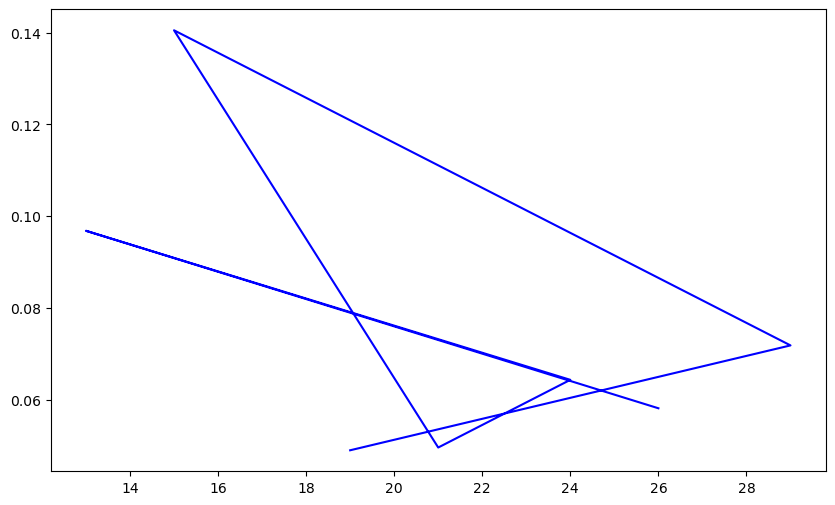

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'y_test' is your actual test data and 'y_pred_lstm' is the LSTM predicted data

# Step 1: Plot Actual vs Predicted values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred_lstm, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time (Weeks)')
plt.ylabel('Value (Crowding / LWBS %)')
plt.legend()
plt.show()

# Step 2: Plot Training and Validation Loss over Epochs (if you used validation data)
# Assume 'history' is the object returned from the 'model.fit()' that contains the loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


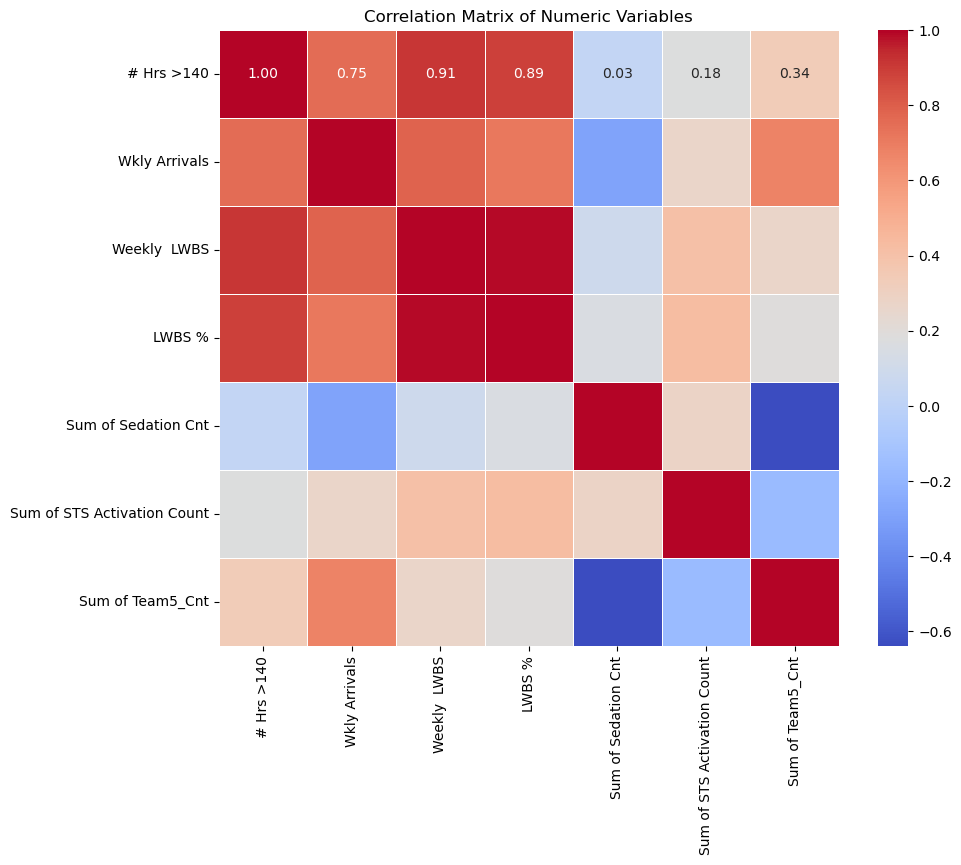

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_columns = df_weekly_data.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 3: Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()
